<a href="https://colab.research.google.com/github/LhGhan/LhGhan/blob/main/Tesla_stock_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install yfinance

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [8]:
from datetime import datetime
end= datetime.now()
start= datetime(end.year-20, end.month,end.day)

In [9]:
stock='TSLA'
df= yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [11]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-08,171.589996,176.059998,170.149994,174.720001,174.720001,79969500
2024-05-09,175.009995,175.619995,171.369995,171.970001,171.970001,65950300
2024-05-10,173.050003,173.059998,167.750000,168.470001,168.470001,72627200
2024-05-13,170.000000,175.399994,169.000000,171.889999,171.889999,67018900
2024-05-14,174.500000,179.490005,174.070007,177.550003,177.550003,86231200


start date= 2010-5-30
end date = 2024-05-13

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-05-08,171.589996,176.059998,170.149994,174.720001,174.720001,79969500
2024-05-09,175.009995,175.619995,171.369995,171.970001,171.970001,65950300
2024-05-10,173.050003,173.059998,167.750000,168.470001,168.470001,72627200


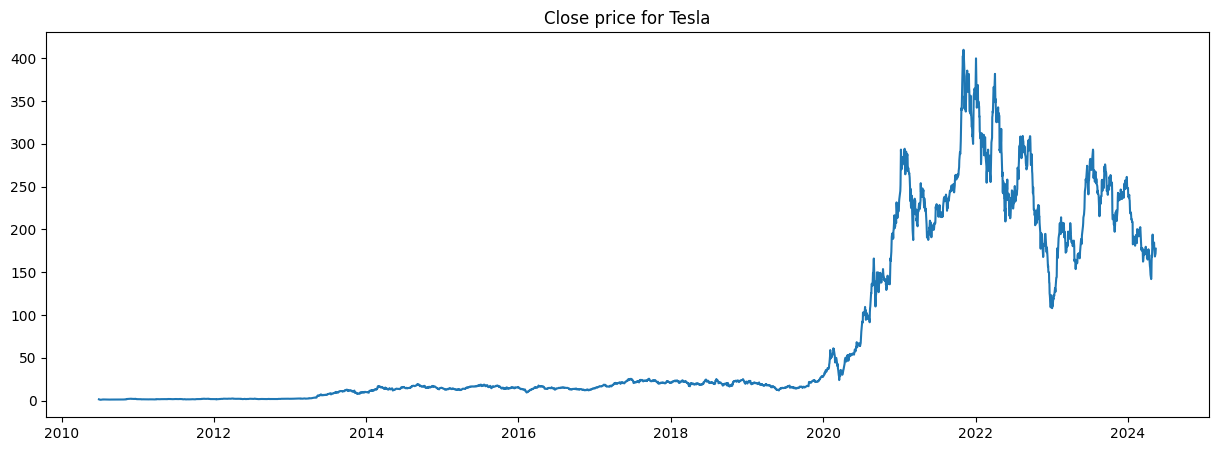

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'],data=df)
plt.title('Close price for Tesla')
plt.show()

In [14]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

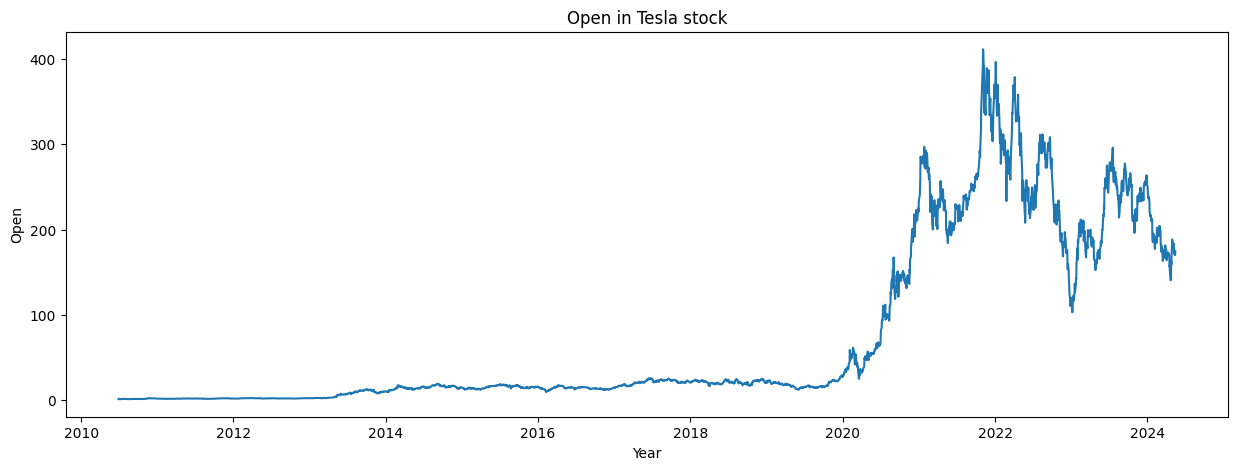

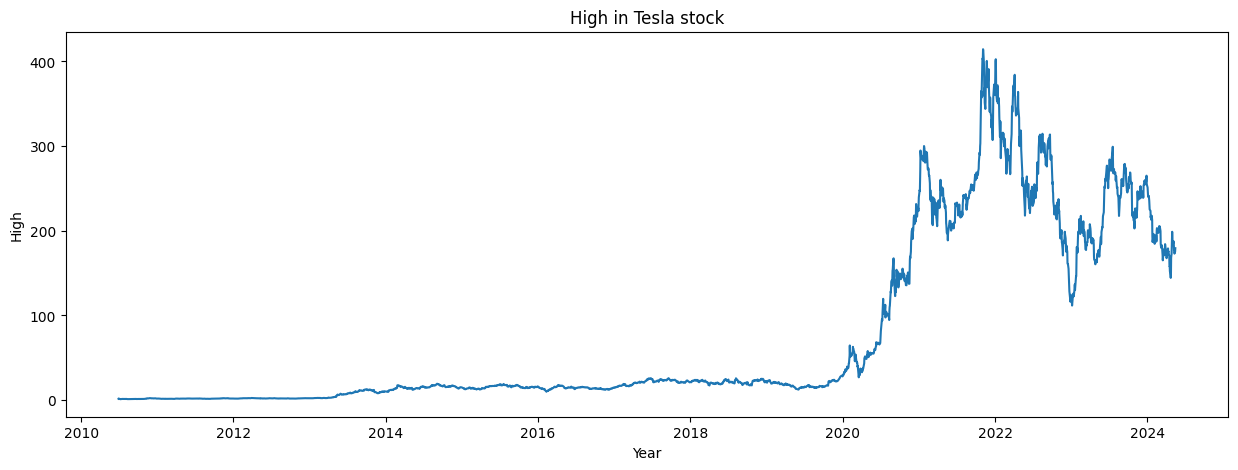

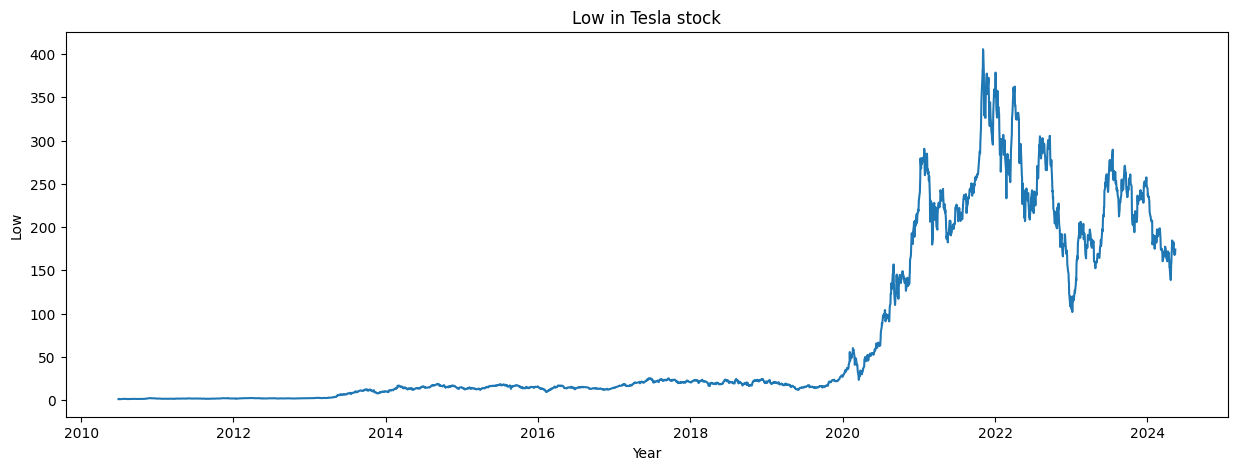

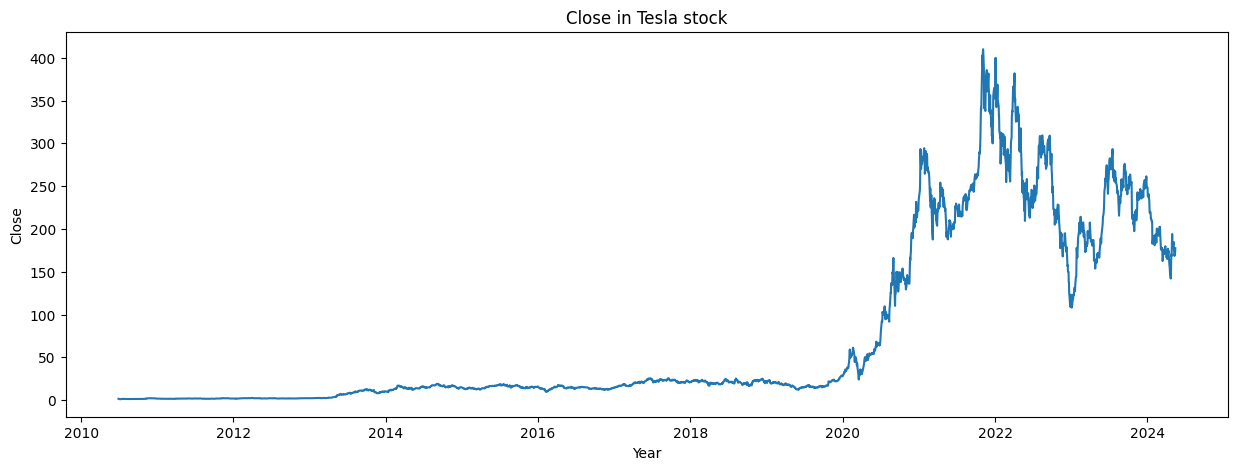

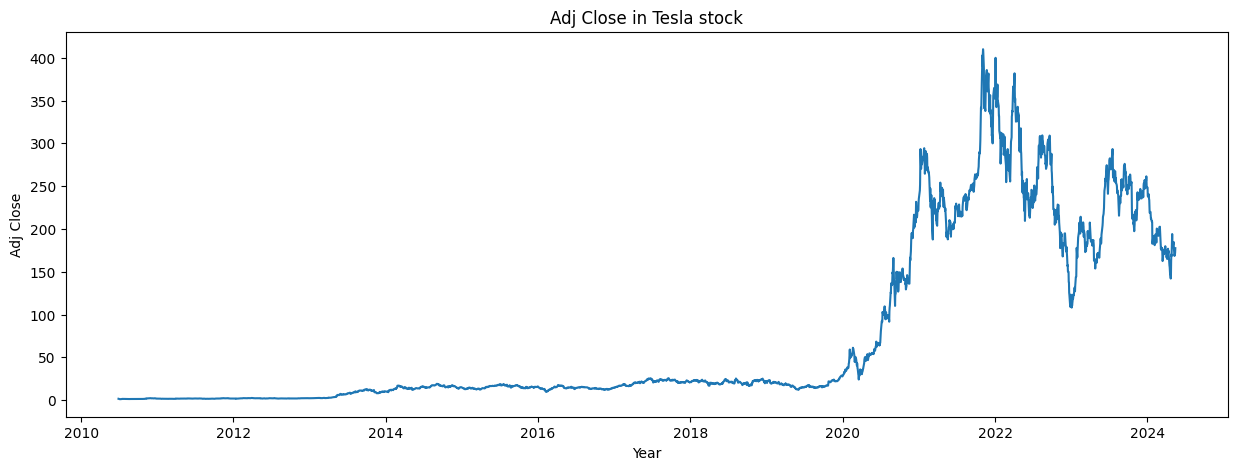

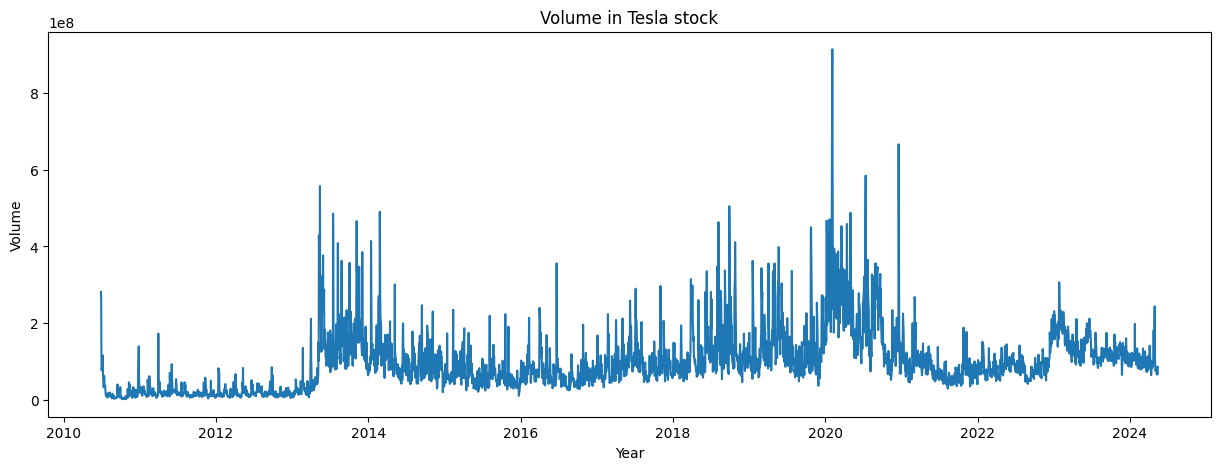

In [15]:
for column_name in df.columns:
  plt.figure(figsize=(15,5))
  plt.plot(df[column_name])
  plt.title(f'{column_name} in Tesla stock')
  plt.xlabel('Year')
  plt.ylabel(column_name)
  plt.show()

Moving Average of the stock

In [16]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-08,171.589996,176.059998,170.149994,174.720001,174.720001,79969500
2024-05-09,175.009995,175.619995,171.369995,171.970001,171.970001,65950300
2024-05-10,173.050003,173.059998,167.750000,168.470001,168.470001,72627200
2024-05-13,170.000000,175.399994,169.000000,171.889999,171.889999,67018900
2024-05-14,174.500000,179.490005,174.070007,177.550003,177.550003,86231200


In [17]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [18]:
df.index.year

Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='Date', length=3493)

In [19]:
df.index.year.value_counts()

Date
2020    253
2011    252
2013    252
2014    252
2015    252
2016    252
2019    252
2021    252
2017    251
2018    251
2022    251
2012    250
2023    250
2010    130
2024     93
Name: count, dtype: int64

In [20]:
#count no of days per year

for i in range(2010,2024):
  print(i,list(df.index.year).count(i))

2010 130
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250


In [21]:
df['MA250']= df['Close'].rolling(250).mean()
df['MA250'].head(250)

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
                ...   
2011-06-17         NaN
2011-06-20         NaN
2011-06-21         NaN
2011-06-22         NaN
2011-06-23    1.629872
Name: MA250, Length: 250, dtype: float64

In [22]:
df['MA100']= df['Close'].rolling(100).mean()
df['MA100'].head()

Date
2010-06-29   NaN
2010-06-30   NaN
2010-07-01   NaN
2010-07-02   NaN
2010-07-06   NaN
Name: MA100, dtype: float64

In [55]:
df['MA50']=df['Close'].rolling(50).mean()
df['MA50']

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
                ...   
2024-05-08    173.0970
2024-05-09    172.4956
2024-05-10    171.8274
2024-05-13    171.2124
2024-05-14    171.0006
Name: MA50, Length: 3493, dtype: float64

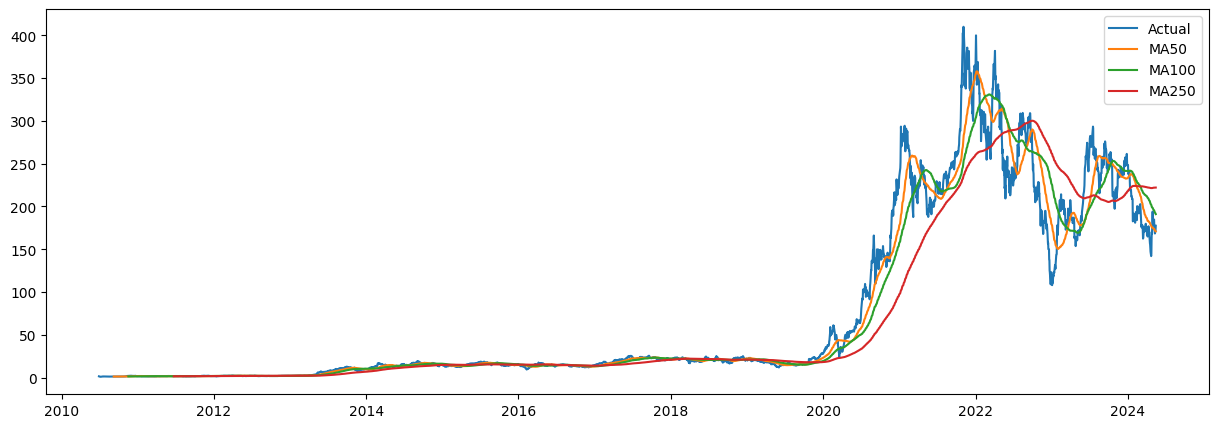

In [56]:
#Data Visualisation

plt.figure(figsize=(15,5))
plt.plot(df['Close'],data=df, label='Actual')
plt.plot(df['MA50'],data=df, label='MA50')
plt.plot(df['MA100'],data=df, label='MA100')
plt.plot(df['MA250'],data=df, label='MA250')
plt.legend()
plt.show()

In [25]:
df['Percentage_change']=df['Close'].pct_change()
df['Percentage_change']

Date
2010-06-29         NaN
2010-06-30   -0.002511
2010-07-01   -0.078473
2010-07-02   -0.125683
2010-07-06   -0.160937
                ...   
2024-05-08   -0.017378
2024-05-09   -0.015739
2024-05-10   -0.020352
2024-05-13    0.020300
2024-05-14    0.032928
Name: Percentage_change, Length: 3493, dtype: float64

In [26]:
df[['Close','Percentage_change']].head()

,Close,Percentage_change
Date,,
2010-06-29,1.592667,NaN
2010-06-30,1.588667,-0.002511
2010-07-01,1.464000,-0.078473
2010-07-02,1.280000,-0.125683
2010-07-06,1.074000,-0.160937


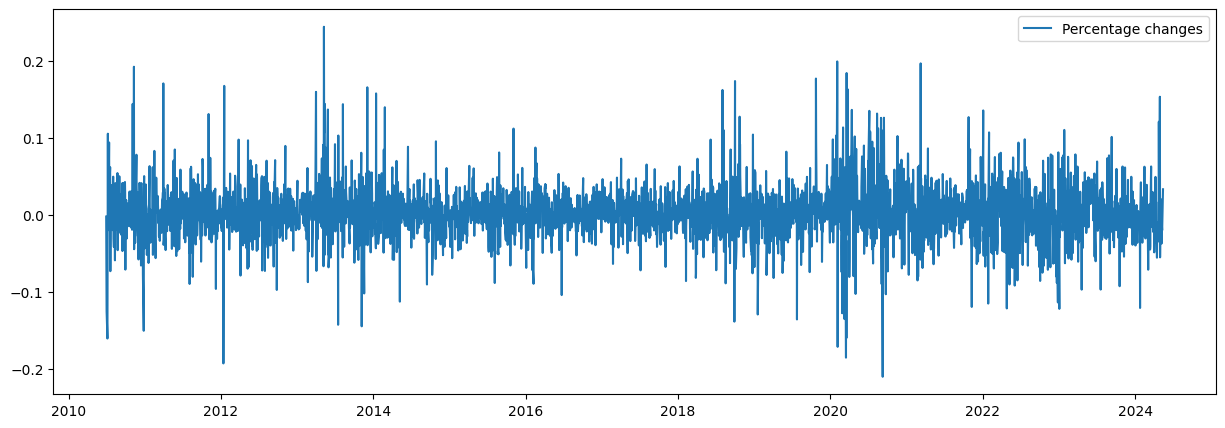

In [27]:
plt.figure(figsize=(15,5))
plt.plot(df['Percentage_change'],data=df,label='Percentage changes')
plt.legend()
plt.show()

Data Scaling

In [28]:
Close_price= df[['Close']]
Close_price

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2024-05-08,174.720001
2024-05-09,171.970001
2024-05-10,168.470001


In [29]:
df['Close'].shape

(3493,)

In [30]:
df[['Close']].shape

(3493, 1)

Using .reshape(1, -1):

The 1 means: "I want the resulting array to have just 1 row."

The -1 acts like a placeholder that tells Python: "Figure out how many columns are needed based on the data, but I want just 1 row."

So, .reshape(1, -1) is saying, "Take my data and organize it into a single row, but I don't care how many columns you need to do that, just make sure it has one row."

In [31]:
z=df['Close'].values.reshape(-1,1)

In [32]:
z.shape

(3493, 1)

In [33]:
scaler= MinMaxScaler(feature_range=(0, 1))
scaled_close= scaler.fit_transform(Close_price)
scaled_close

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.40941512],
       [0.41777868],
       [0.43162014]])

In [34]:
scales = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
scales

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.40941512],
       [0.41777868],
       [0.43162014]])

In [35]:
len(scaled_close)

3493

**Spliting dataset into x and y**

  for i in range(100,3493):

  x.append(scaled_close[i-100:i])

  y.append(scaled_close[i:0])





1.Looping through Data: This code runs a loop starting from the 100th element (i = 100) up to the end of the scaled_adj_close data.

2.Creating Training Samples (X):

For each step in the loop, it creates a sample X, which is a sequence of the 100 previous scaled values before the current value (scaled_adj_close[i-100:i]).
Imagine you have a list of numbers representing stock prices over time. This code takes 100 consecutive days of stock prices and creates a sample from them. It then moves one day forward and repeats the process. It's like sliding a window along the sequence of stock prices, each time taking the previous 100 days as a sample.

3.Creating Target Values (y):

For each step in the loop, it creates a target value y, which is the next scaled value after the 100 values used to create X.
Continuing the stock price example, if X represents 100 days of stock prices, y represents the stock price for the next day. So, y is essentially the "answer" or "prediction target" for the model: given the previous 100 days of stock prices, what will be the stock price on the next day?
In summary, this code prepares data for a machine learning model by creating training samples (X) and their corresponding target values (y). Each X contains a sequence of 100 scaled values (like a window of historical data), and each y contains the scaled value that comes immediately after that sequence. This setup is commonly used for sequence prediction tasks, like predicting future values based on past data.

In [36]:
x=[]
y=[]

for i in range(100,3493):
  x.append(scaled_close[i-100:i])
  y.append(scaled_close[i])



In [37]:
x[1]

array([[1.30915180e-03],
       [1.00428027e-03],
       [5.54310805e-04],
       [5.05407544e-05],
       [0.00000000e+00],
       [2.70634579e-04],
       [2.60852469e-04],
       [2.03792057e-04],
       [3.81495574e-04],
       [6.58652434e-04],
       [6.66803171e-04],
       [7.89077648e-04],
       [9.96129534e-04],
       [7.33645693e-04],
       [7.20604046e-04],
       [8.47769140e-04],
       [8.95047734e-04],
       [8.39618402e-04],
       [7.74404629e-04],
       [8.02119295e-04],
       [7.41799054e-04],
       [6.74953909e-04],
       [8.34727493e-04],
       [1.00264919e-03],
       [8.90156824e-04],
       [7.58100530e-04],
       [6.17893497e-04],
       [6.19524578e-04],
       [5.26596139e-04],
       [3.42368009e-04],
       [2.93458335e-04],
       [4.10841611e-04],
       [4.85837203e-04],
       [5.46160067e-04],
       [4.84206122e-04],
       [4.87468283e-04],
       [5.38006705e-04],
       [7.05931027e-04],
       [5.54310805e-04],
       [6.68434252e-04],


In [38]:
y[1]

array([0.00247646])

In [39]:
#check the y values
scaled_close[101]

array([0.00247646])

In [40]:
x,y =np.array(x),np.array(y)

**Spliting dataset into test and train **

1.   training dataset 70%
2.   testing dataset 30%



In [41]:
#training dataset
int(len(x)*0.7)

2375

In [42]:
3493-100-int(len(x)*0.7)

1018

In [43]:
split_lens= int(len(x)*0.7)

x_train= x[:split_lens]
y_train=y[:split_lens]

x_test= x[split_lens:]
y_test=y[split_lens:]

In [44]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((2375, 100, 1), (2375, 1), (1018, 100, 1), (1018, 1))

In [45]:
x_train.shape[1]

100

LSTM Model

In [46]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout



In [47]:
model= Sequential()

model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.5))

model.add(LSTM(60,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 60)                45360     
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 111981 (437.43 KB)
Trainable params: 111981 (437.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model.compile(optimizer='adam', loss=' mean_squared_error')

In [50]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
75/75 [==============================] - 32s 359ms/step - loss: 1.2358e-04
Epoch 2/5
75/75 [==============================] - 14s 187ms/step - loss: 3.2331e-05
Epoch 3/5
75/75 [==============================] - 14s 189ms/step - loss: 2.2809e-05
Epoch 4/5
75/75 [==============================] - 14s 188ms/step - loss: 2.4552e-05
Epoch 5/5
75/75 [==============================] - 14s 186ms/step - loss: 2.1710e-05


In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 60)                45360     
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 111981 (437.43 KB)
Trainable params: 111981 (437.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
y_predict= model.predict(x_test)

32/32 [==============================] - 3s 58ms/step


In [52]:
y_predict

array([[0.12697832],
       [0.12838507],
       [0.12958957],
       ...,
       [0.45746383],
       [0.45460373],
       [0.45085865]], dtype=float32)

In [53]:
y_test

array([[0.12793315],
       [0.12489586],
       [0.11176197],
       ...,
       [0.40941512],
       [0.41777868],
       [0.43162014]])

In [58]:
inv_predict = scaler.inverse_transform(y_predict)
inv_predict

array([[ 52.976883],
       [ 53.552124],
       [ 54.044666],
       ...,
       [188.11792 ],
       [186.94838 ],
       [185.41695 ]], dtype=float32)

In [59]:
inv_test = scaler.inverse_transform(y_test)
inv_test

array([[ 53.36733246],
       [ 52.12533188],
       [ 46.75466537],
       ...,
       [168.47000122],
       [171.88999939],
       [177.55000305]])

In [63]:
df1 = pd.DataFrame(
    {'Predicted Close Price':inv_predict.reshape(-1),
    'Original Close Price':inv_test.reshape(-1)
    },
    index=df.index[split_lens+100:])

df1.head(10)

,Predicted Close Price,Original Close Price
Date,,
2020-04-29,52.976883,53.367332
2020-04-30,53.552124,52.125332
2020-05-01,54.044666,46.754665
2020-05-04,54.010990,50.745998
2020-05-05,53.928764,51.214001
2020-05-06,53.858528,52.172001
2020-05-07,53.881531,52.002666
2020-05-08,53.956570,54.627998
2020-05-11,54.273323,54.085999


In [64]:
df1.tail()

,Predicted Close Price,Original Close Price
Date,,
2024-05-08,187.219421,174.720001
2024-05-09,188.234650,171.970001
2024-05-10,188.117920,168.470001
2024-05-13,186.948380,171.889999
2024-05-14,185.416946,177.550003


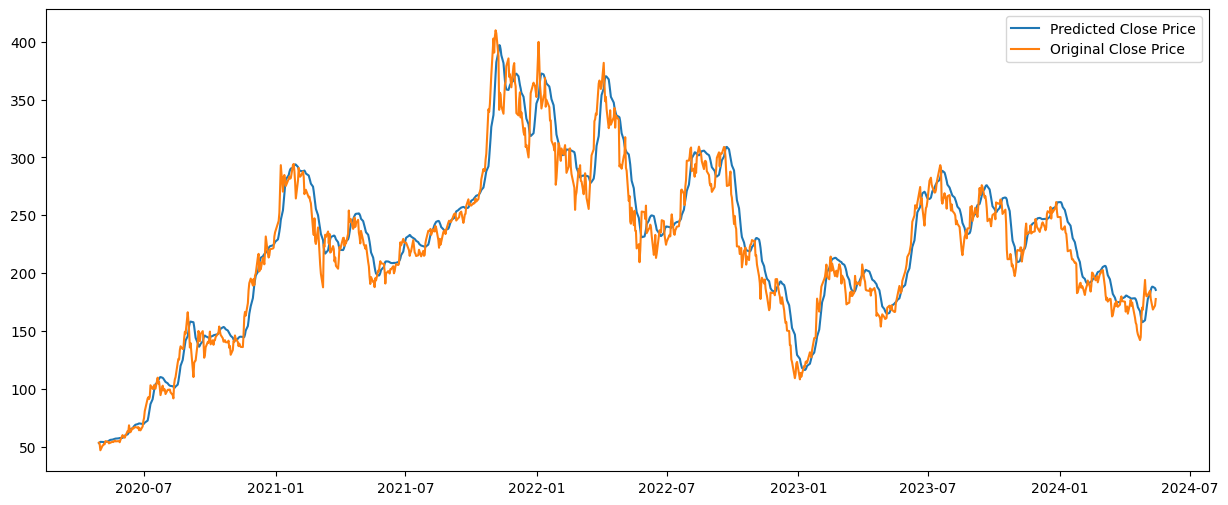

In [66]:
plt.figure(figsize=(15,6))
plt.plot(df1,label=['Predicted Close Price','Original Close Price'])
plt.legend()
plt.show()